# Forecasting Bitcoin Price
### Data Collection & Preprocessing

The first thing to do is collecting data. 
We will use Yahoo Bitcoin History, the data is free to download. Available [here](https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD&guccounter=1&guce_referrer=aHR0cHM6Ly90b3dhcmRzZGF0YXNjaWVuY2UuY29tL3ByZWRpY3RpbmctcHJpY2VzLW9mLWJpdGNvaW4td2l0aC1tYWNoaW5lLWxlYXJuaW5nLTNlODNiYjRkZDM1Zg&guce_referrer_sig=AQAAADw3s4Aaum1jPPN-7OIUDQmu6j4SiVGzs0U51SpDhE84Ec30JpqsegxOZYH5lnrNdcM-ZqTtFRI7VLXpikmV4GPDk1ZDnQeBQrtA4W96EdxGo0dwZbtcLWqtK3z3POErPkEb1VvQe0PF8fBlArbyg2HguzJ8pEXcT7ptl3tqR5iZ).
We should use enough historical data to make the model more accurate. We are using historical data for bitcoin and usd prices from Aug 2018 to Dec 2021.

Reading and Displaying BTC Time Series Data

In [318]:
#importing libraries
import pandas_datareader.data as web
import datetime
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [319]:
# getting bitcoin data from 2018 to 2021
btc = web.get_data_yahoo(['BTC-USD'], start=datetime.datetime(2018, 1, 2), end=datetime.datetime(2021, 12, 31))['Close']
print(btc)
print(btc.shape)

Symbols          BTC-USD
Date                    
2018-01-01  13657.200195
2018-01-02  14982.099609
2018-01-03  15201.000000
2018-01-04  15599.200195
2018-01-05  17429.500000
2018-01-06  17527.000000
2018-01-07  16477.599609
2018-01-08  15170.099609
2018-01-09  14595.400391
2018-01-10  14973.299805
2018-01-11  13405.799805
2018-01-12  13980.599609
2018-01-13  14360.200195
2018-01-14  13772.000000
2018-01-15  13819.799805
2018-01-16  11490.500000
2018-01-17  11188.599609
2018-01-18  11474.900391
2018-01-19  11607.400391
2018-01-20  12899.200195
2018-01-21  11600.099609
2018-01-22  10931.400391
2018-01-23  10868.400391
2018-01-24  11359.400391
2018-01-25  11259.400391
2018-01-26  11171.400391
2018-01-27  11440.700195
2018-01-28  11786.299805
2018-01-29  11296.400391
2018-01-30  10106.299805
2018-01-31  10221.099609
2018-02-01   9170.540039
2018-02-02   8830.750000
2018-02-03   9174.910156
2018-02-04   8277.009766
2018-02-05   6955.270020
2018-02-06   7754.000000
2018-02-07   7621.299805


Write the BTC price data to a csv file. This way, we can avoid having to repeatedly pull data. 

In [320]:
btc.to_csv("data/btc.csv")

Now, let’s read in our csv file and display the first five rows:

In [321]:
btc = pd.read_csv("data/btc.csv")
print(btc)

            Date       BTC-USD
0     2018-01-01  13657.200195
1     2018-01-02  14982.099609
2     2018-01-03  15201.000000
3     2018-01-04  15599.200195
4     2018-01-05  17429.500000
5     2018-01-06  17527.000000
6     2018-01-07  16477.599609
7     2018-01-08  15170.099609
8     2018-01-09  14595.400391
9     2018-01-10  14973.299805
10    2018-01-11  13405.799805
11    2018-01-12  13980.599609
12    2018-01-13  14360.200195
13    2018-01-14  13772.000000
14    2018-01-15  13819.799805
15    2018-01-16  11490.500000
16    2018-01-17  11188.599609
17    2018-01-18  11474.900391
18    2018-01-19  11607.400391
19    2018-01-20  12899.200195
20    2018-01-21  11600.099609
21    2018-01-22  10931.400391
22    2018-01-23  10868.400391
23    2018-01-24  11359.400391
24    2018-01-25  11259.400391
25    2018-01-26  11171.400391
26    2018-01-27  11440.700195
27    2018-01-28  11786.299805
28    2018-01-29  11296.400391
29    2018-01-30  10106.299805
30    2018-01-31  10221.099609
31    20

In order to use the models provided by the stats library, we need to set the date column to be a data frame index. We also should format that date using the to_datetime method:

In [322]:
btc.index = pd.to_datetime(btc['Date'], format='%Y-%m-%d')

Removing dates. We just use years and months data to analyze and forecast.

In [323]:
del btc['Date']

Let’s plot our time series data. To do this, let’s import the data visualization libraries Seaborn and Matplotlib:

In [324]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

And label the y-axis and x-axis using Matplotlib. We will also rotate the dates on the x-axis so that they’re easier to read:

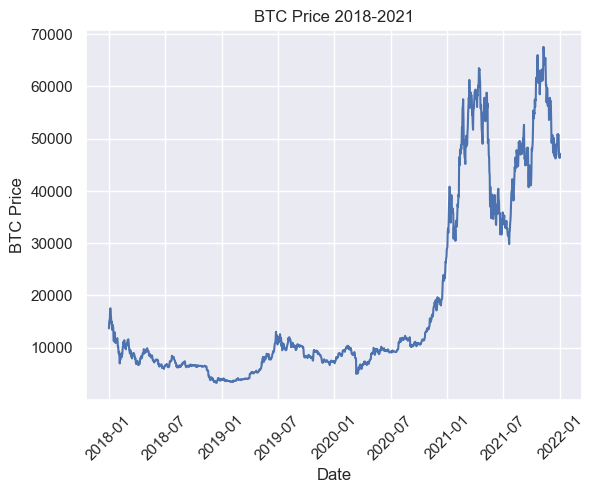

In [325]:
plt.title("BTC Price 2018-2021")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(btc.index, btc['BTC-USD'], )

### Splitting Data for Training and Testing

An important part of model building is splitting our data for training and testing, which ensures that you build a model that can generalize outside of the training data and that the performance and outputs are statistically meaningful. 

We will split our data such that everything before November 2021 will serve as training data, with everything after November 2021 becoming the testing data:

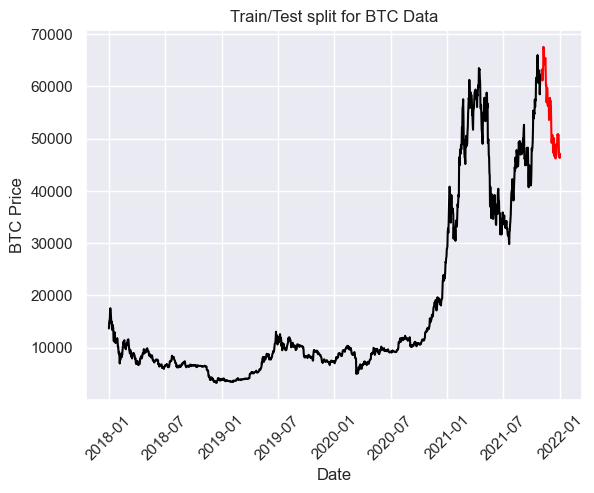

In [326]:
train = btc[btc.index < pd.to_datetime("2021-11-01", format='%Y-%m-%d')]
test = btc[btc.index > pd.to_datetime("2021-11-01", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

Auto Regressive Moving Average (ARMA)

In [327]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#define input
y = train['BTC-USD']
ARMAmodel = SARIMAX(y, order = (5, 5, 5))
ARMAmodel = ARMAmodel.fit()

/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08120D+01    |proj g|=  2.77730D+00

At iterate    5    f=  8.74606D+00    |proj g|=  1.07141D-01

At iterate   10    f=  8.65199D+00    |proj g|=  2.88677D-01

At iterate   15    f=  8.56131D+00    |proj g|=  8.41231D-02

At iterate   20    f=  8.50291D+00    |proj g|=  8.95689D-02

At iterate   25    f=  8.49118D+00    |proj g|=  1.26147D-02

At iterate   30    f=  8.48910D+00    |proj g|=  4.43322D-02

At iterate   35    f=  8.48854D+00    |proj g|=  1.62448D-03

At iterate   40    f=  8.48851D+00    |proj g|=  1.06366D-02

At iterate   45    f=  8.48819D+00    |proj g|=  7.49728D-02

At iterate   50    f=  8.48693D+00    |proj g|=  1.32522D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Generate our predictions:

In [328]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

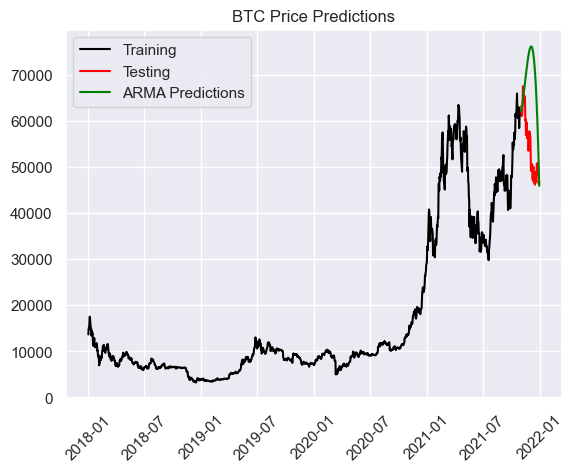

In [329]:
plt.plot(train, color = "black", label = "Training")
plt.plot(test, color = "red", label = "Testing")
plt.plot(y_pred_out, color='green', label = 'ARMA Predictions')
plt.xticks(rotation=45)
plt.title("BTC Price Predictions")
plt.legend()

We can also evaluate the performance using the root mean-squared error:

In [330]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  16750.25137967897


Autoregressive Integrated Moving Average (ARIMA)

In [331]:
from statsmodels.tsa.arima.model import ARIMA

/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


RMSE:  12429.869296545325


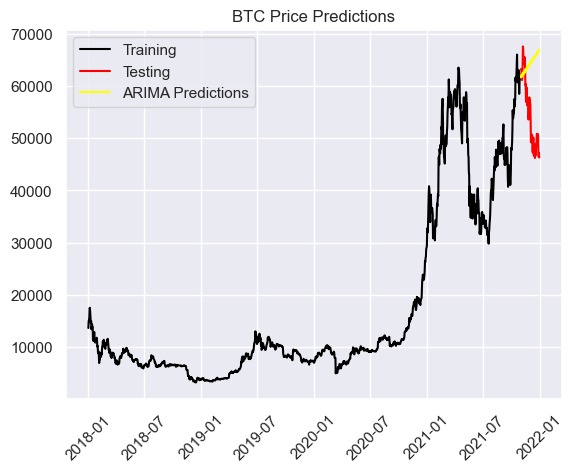

In [332]:
ARIMAmodel = ARIMA(y, order = (4, 2, 4))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(train, color = "black", label = "Training")
plt.plot(test, color = "red", label = "Testing")
plt.plot(y_pred_out, color='yellow', label = 'ARIMA Predictions')
plt.xticks(rotation=45)
plt.title("BTC Price Predictions")
plt.legend()

import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

Seasonal ARIMA (SARIMA)

/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.80531D+00    |proj g|=  3.80158D-01

At iterate    5    f=  8.68546D+00    |proj g|=  9.94273D-03

At iterate   10    f=  8.67902D+00    |proj g|=  2.03323D-03

At iterate   15    f=  8.67064D+00    |proj g|=  3.92076D-02

At iterate   20    f=  8.66245D+00    |proj g|=  2.70205D-03

At iterate   25    f=  8.66196D+00    |proj g|=  1.58404D-03

At iterate   30    f=  8.66185D+00    |proj g|=  1.32479D-03

At iterate   35    f=  8.65866D+00    |proj g|=  2.01831D-02

At iterate   40    f=  8.57224D+00    |proj g|=  4.36814D-02

At iterate   45    f=  8.35758D+00    |proj g|=  6.94243D-02


/Users/thaonguyen/opt/anaconda3/envs/.venv/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f=  8.28423D+00    |proj g|=  9.11176D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   9.112D-02   8.284D+00
  F =   8.2842319636946709     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


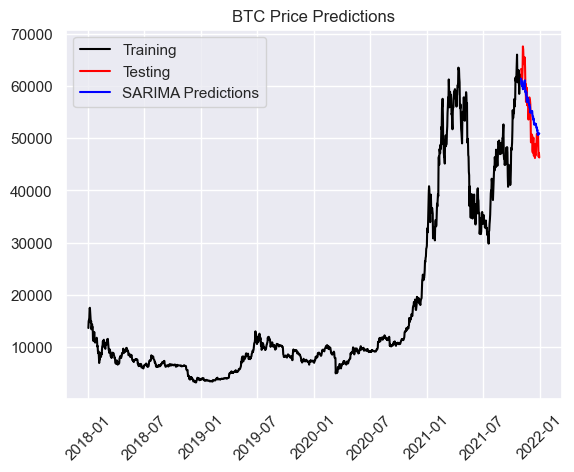

In [333]:
SARIMAXmodel = SARIMAX(y, order = (1, 0, 1), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(train, color = "black", label = "Training")
plt.plot(test, color = "red", label = "Testing")
plt.plot(y_pred_out, color='blue', label = 'SARIMA Predictions')
plt.title("BTC Price Predictions")
plt.xticks(rotation=45)
plt.legend()